In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# sns.pairplot( 'input_data', 구별할 컬럼기준)

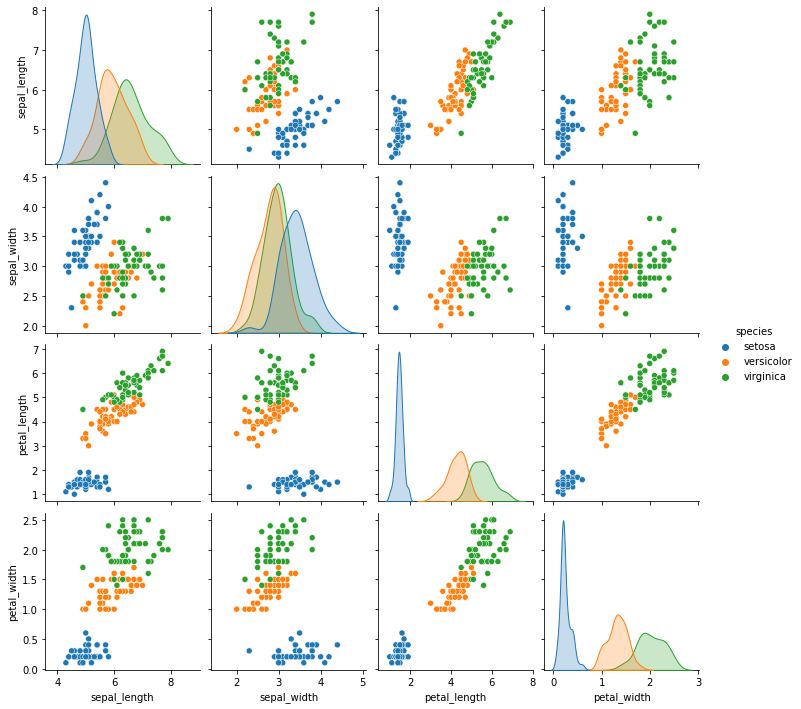

In [4]:
sns.pairplot(iris, hue='species')

# plt.scatter() c='구별할 컬럼' 가장 대표적 산점도

# sns.scatterplit(x,y,hue='구별할컬럼')

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


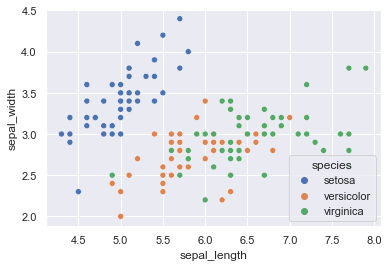

In [5]:
sns.set()
sns.scatterplot(iris['sepal_length'],iris['sepal_width'],hue=iris['species'])

# sns.displot() 분포를 표현

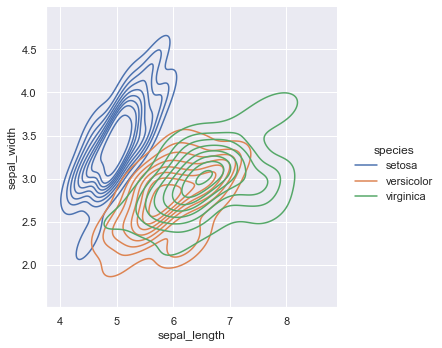

In [6]:
sns.displot(data=iris , x='sepal_length',y='sepal_width',kind='kde',hue='species')

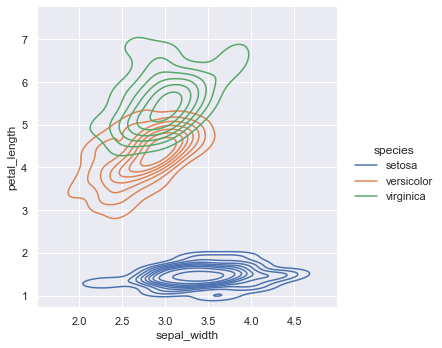

In [7]:
sns.displot(data=iris,x='sepal_width',y='petal_length',hue='species',kind='kde')

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


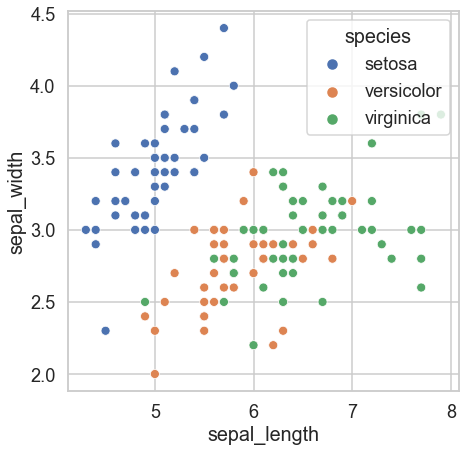

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.scatterplot(iris.sepal_length , iris.sepal_width ,data=iris,hue='species')

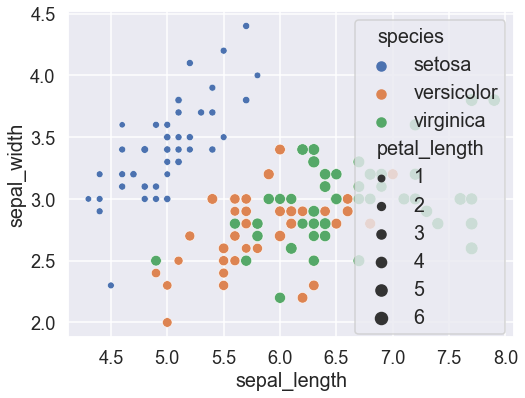

In [15]:
sns.set_style("darkgrid")
sns.set_context('talk',font_scale=1.1)
plt.figure(figsize=(8,6))
sns.scatterplot(iris.sepal_length , iris.sepal_width, size=iris.petal_length  , data=iris ,hue='species')
